In [1]:
import graph_tool.all as gt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gt.collection.ns_info

{'7th_graders': {'analyses': {'average_degree': 25.517241379310345,
   'degree_assortativity': -0.008012648144179957,
   'degree_std_dev': 20.34272344466823,
   'diameter': 2,
   'edge_properties': [['weight', 'bool'], ['layer', 'int16_t']],
   'edge_reciprocity': 0.722972972972973,
   'global_clustering': 0.7612141495839725,
   'hashimoto_radius': 17.728426484911438,
   'is_bipartite': False,
   'is_directed': True,
   'knn_proj_1': 4.19853448453512,
   'knn_proj_2': 2.69071694881046,
   'largest_component_fraction': 1.0,
   'mixing_time': 1.7092442401165702,
   'num_edges': 740,
   'num_vertices': 29,
   'transition_gap': 0.5570758374616304,
   'vertex_properties': [['name', 'string'], ['_pos', 'vector<double>']]},
  'bibtex': ['@article{mathews_secondary_1976,\n  doi          = {10.1080/17508487609556100},\n  url          = {https://doi.org/10.1080%2F17508487609556100},\n  year         = 1976,\n  month        = jan,\n  publisher    = {Informa {UK} Limited},\n  volume       = 18,\n  

In [4]:
gt.collection.ns_info['add_health']['tags']

['Social', 'Offline', 'Weighted']

In [5]:
def uncover_ns_analyses(cover_name: str, analyses: dict, names: list, tags: list) -> list[str]:
    result_list = []
    for name in names:
        info = analyses[name].copy()
        info['name'] = f'{cover_name}+{name}'
        info['tags'] = tags
        result_list.append(info)
    return result_list

In [6]:
def get_ns_graphs_info_list() -> list:
    list_of_dict = []
    for key, value in gt.collection.ns_info.items():
        if(len(value['nets']) == 1):
            info = value['analyses'].copy()
            info['name'] = key
            info['tags']=value['tags']
            list_of_dict.append(info)
        else:
            list_of_dict.extend(
                uncover_ns_analyses(
                    cover_name=key,
                    analyses=value['analyses'],
                    names=value['nets'],
                    tags=value['tags']
                )
            )
    return list_of_dict

In [7]:
ns_graph_info_df = pd.DataFrame(get_ns_graphs_info_list())
ns_graph_info_df.head()

average_degree  degree_assortativity  degree_std_dev  diameter  \
0       25.517241             -0.008013       20.342723         2   
1        6.984413             -0.016419       46.241795        16   
2        4.295775              0.165931        4.470805         6   
3        4.100917              0.245513        5.368580         7   
4        3.968750              0.343262        4.866579         5   

                      edge_properties  edge_reciprocity  global_clustering  \
0  [[weight, bool], [layer, int16_t]]          0.722973           0.761214   
1                                  []          0.537030           0.036263   
2             [[activities, int16_t]]          0.557377           0.423140   
3             [[activities, int16_t]]          0.438479           0.376409   
4             [[activities, int16_t]]          0.566929           0.489683   

   hashimoto_radius  is_bipartite  is_directed  knn_proj_1  knn_proj_2  \
0         17.728426         False         True    4.198534    2.690717   
1        109.991372         False         True    3.944805    2.309252   
2          6.790672         False         True    4.008662    2.579694   
3          9.553534         False         True    3.962824    2.640243   
4          6.832615         False         True    4.025996    2.588898   

   largest_component_fraction  mixing_time  num_edges  num_vertices  \
0                    1.000000     1.709244        740            29   
1                    0.999990    78.338610    1398063        200169   
2                    0.971831    17.574715        305            71   
3                    0.944954    20.400986        447           109   
4                    1.000000     7.724657        127            32   

   transition_gap                                  vertex_properties  \
0        0.557076           [[name, string], [_pos, vector<double>]]   
1        0.987316          [[name, int32_t], [_pos, vector<double>]]   
2        0.944689  [[sex, int16_t], [race, int16_t], [grade, int1...   
3        0.952165  [[sex, int16_t], [race, int16_t], [grade, int1...   
4        0.878574  [[sex, int16_t], [race, int16_t], [grade, int1...   

               name                                               tags  
0       7th_graders  [Social, Offline, Multilayer, Unweighted, Meta...  
1      academia_edu                       [Social, Online, Unweighted]  
2  add_health+comm1                        [Social, Offline, Weighted]  
3  add_health+comm2                        [Social, Offline, Weighted]  
4  add_health+comm3                        [Social, Offline, Weighted]

In [17]:
ns_graph_info_df_short = ns_graph_info_df[~ns_graph_info_df['name'].str.startswith(('openstreetmap','human_brains'))]

In [18]:
print(f'Number of netwroks:{len(ns_graph_info_df)}')
print(f'Number of netwroks excluding openstreetmap, human_brains {len(ns_graph_info_df_short)}')

Number of netwroks:163735
Number of netwroks excluding openstreetmap, human_brains 6440


In [14]:
ns_graph_tag_count = ns_graph_info_df['tags'].explode().value_counts().sort_values(ascending=True)
ns_graph_tag_count

tags
Conflict              1
Food Web              1
Uncertain             1
Power grid            1
Cryptocurrency        1
                  ...  
Biological        68373
Roads             91118
Transportation    91124
Multigraph        91759
Unweighted        93332
Name: count, Length: 65, dtype: int64

In [19]:
ns_graph_tag_count_short = ns_graph_info_df_short['tags'].explode().value_counts().sort_values(ascending=True)
ns_graph_tag_count_short

tags
Conflict                   1
Food Web                   1
Uncertain                  1
Power grid                 1
Drug interactions          1
                        ... 
Weighted                1875
Protein interactions    1911
Social                  2073
Biological              2118
Unweighted              2292
Name: count, Length: 65, dtype: int64

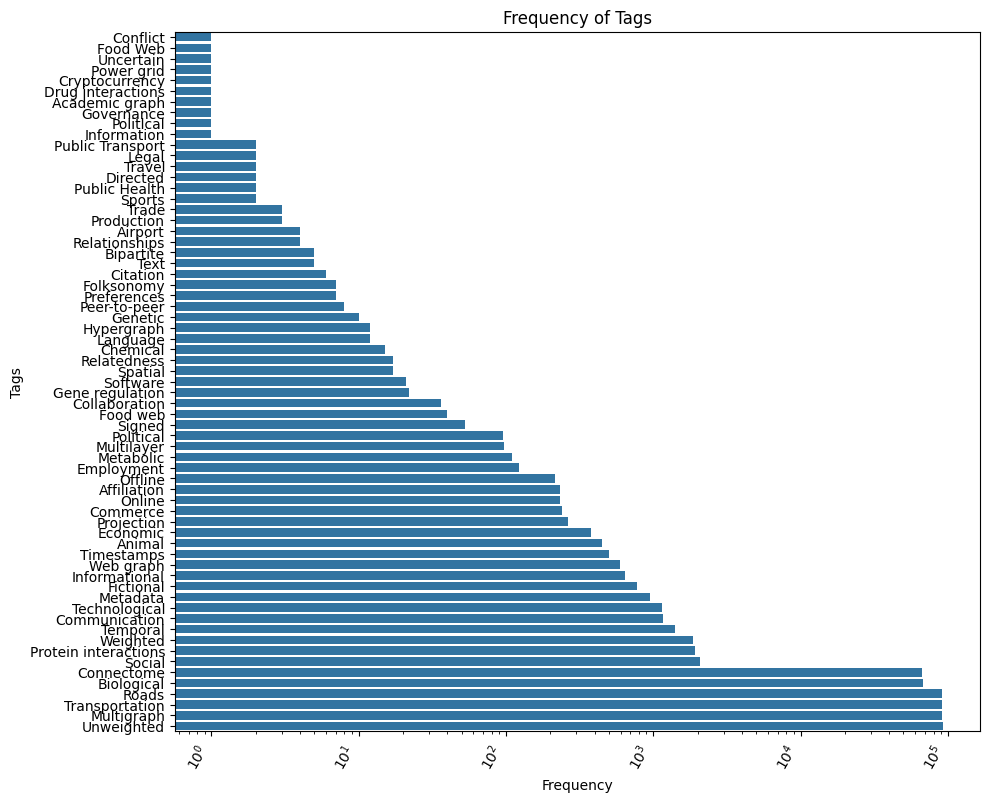

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(x=ns_graph_tag_count.values, y=ns_graph_tag_count.index, errorbar=None,  orient="h")
plt.title("Frequency of Tags")
plt.xlabel("Frequency")
plt.xscale('log')
plt.ylabel("Tags")
plt.tight_layout()

plt.xticks(rotation=60, ha='right')

plt.show()

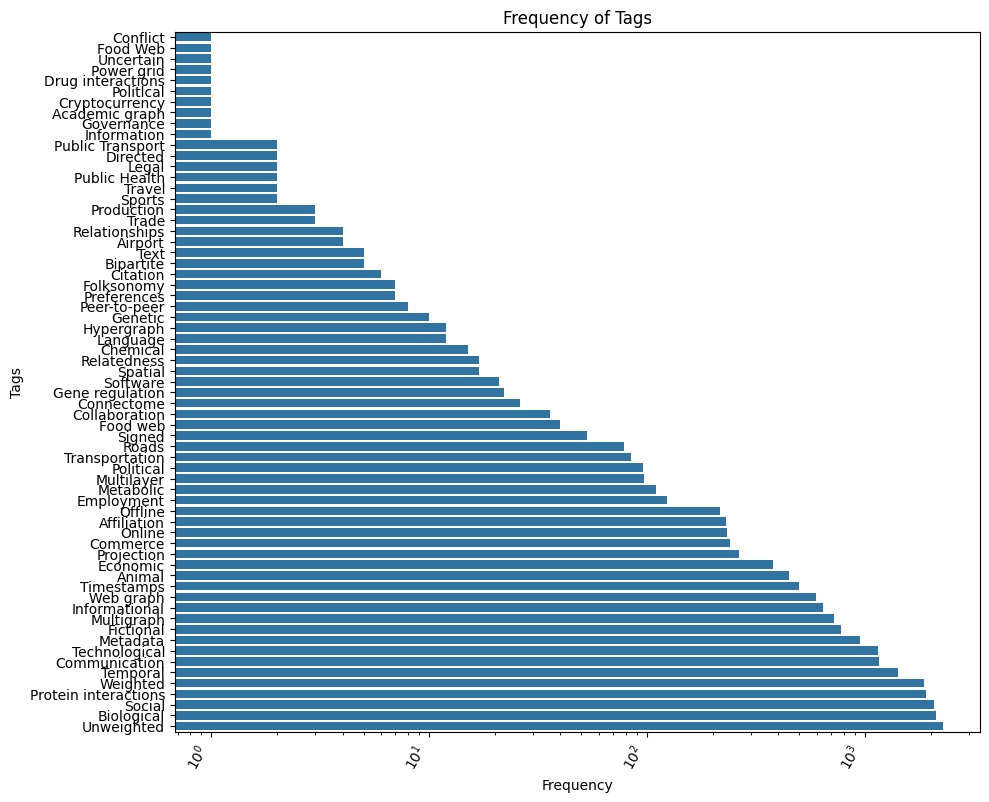

In [22]:
plt.figure(figsize=(10, 8))
sns.barplot(x=ns_graph_tag_count_short.values, y=ns_graph_tag_count_short.index, errorbar=None,  orient="h")
plt.title("Frequency of Tags")
plt.xlabel("Frequency")
plt.xscale('log')
plt.ylabel("Tags")
plt.tight_layout()

plt.xticks(rotation=60, ha='right')

plt.show()